In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Analysis of stat

In [ ]:
stat_df = pd.read_csv('../result/experiment_rq_mle/stat_mle_RQ.csv')
stat_df

In [ ]:
stat_to_csv_df = {
    'model': [],
    'quantile': [],
    'loss': [],
    'mle\'s loss': [],
    'RQ\'s loss': [],
    'hit_rate_in': [],
    'mle\'s hit_rate_in': [],
    'RQ\'s hit_rate_in': [],
    'hit_rate_out': [],
    'mle\'s hit_rate_out': [],
    'RQ\'s hit_rate_out': [],
}

keys = [key for key in stat_to_csv_df][2:]

for q in stat_df['quantile'].unique():
    for mod in stat_df['model'].unique():
        cond1 = stat_df['quantile']==q
        cond2 = stat_df['model']==mod
        
        stat_to_csv_df['model'].append(mod)
        stat_to_csv_df['quantile'].append(q)
        
        for i, metric in enumerate(stat_df.columns[4:7]):
            try:
                x = stat_df[(stat_df['method']=='mle')&cond1&cond2][metric]
                y = stat_df[(stat_df['method']=='RQ')&cond1&cond2][metric]
    #             x = stat_df[(stat_df['method']=='mle')&(stat_df['best_start']==False)&cond1&cond2][metric]
    #             y = stat_df[(stat_df['method']=='RQ')&(stat_df['best_start']==False)&cond1&cond2][metric]
                if metric=='loss':
                    print('loss:', x.mean() < y.mean())
                if metric=='hit_rate_in':
                    print('hit_rate_in:', abs(0.05 - x.mean()) < abs(0.05 - y.mean()))
                if metric=='hit_rate_out':
                    print('hit_rate_out:', abs(0.05 - x.mean()) < abs(0.05 - y.mean()))
                stat_to_csv_df[keys[i*3]].append('accepted' if mannwhitneyu(x, y)[1] > 0.05 else 'rejected')
                stat_to_csv_df[keys[i*3+1]].append(np.round(x.mean(), 6))
                stat_to_csv_df[keys[i*3+2]].append(np.round(y.mean(), 6))
            except:
                # they are exactly the same 
                stat_to_csv_df[keys[i*3]].append('accepted')
                stat_to_csv_df[keys[i*3+1]].append(np.round(x.mean(), 6))
                stat_to_csv_df[keys[i*3+2]].append(np.round(y.mean(), 6))

In [ ]:
# pd.DataFrame(stat_to_csv_df).T.to_csv('../result/stat_test/stat_mle_RQ_analysis_res.csv')
pd.DataFrame(stat_to_csv_df).T

# Analysis of beta

In [2]:
beta_df = pd.read_csv('../result/experiment_rq_mle/beta_mle_RQ.csv')
beta_df

,beta,coefficient,S.E. of beta,pval of beta,quantile,model,method,trial
0,beta1,-0.655107,0.041220,3.540000e-57,0.05,adaptive,RQ,0
1,beta1,-0.655127,0.041243,4.040000e-57,0.05,adaptive,RQ,1
2,beta1,-0.655156,0.041276,4.920000e-57,0.05,adaptive,RQ,2
3,beta1,-0.655156,0.041277,4.920000e-57,0.05,adaptive,RQ,3
4,beta1,-0.655193,0.041319,6.300000e-57,0.05,adaptive,RQ,4
...,...,...,...,...,...,...,...,...
1315,beta2,0.887764,0.027544,3.270000e-228,0.01,igarch,mle,28
1316,beta3,0.510932,0.183023,2.622130e-03,0.01,igarch,mle,28
1317,beta1,0.274409,0.087304,8.357420e-04,0.01,igarch,mle,29
1318,beta2,0.876903,0.047728,1.080000e-75,0.01,igarch,mle,29


beta1 0.038633931722922


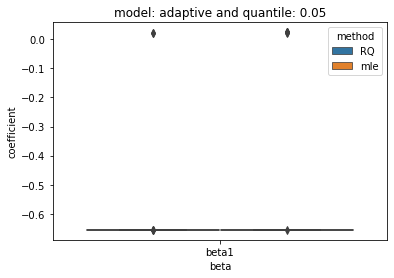

beta1 0.13374802829003823


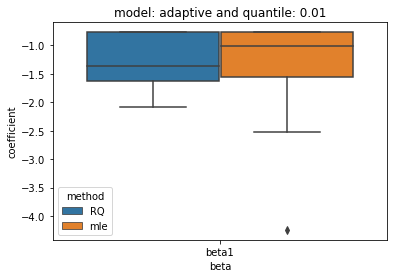

beta1 0.12594041233095615
beta2 0.11992499559553982
beta3 0.11992499559553982


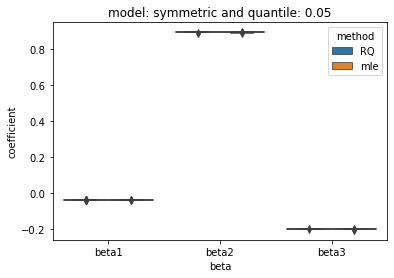

beta1 0.18951815538696792
beta2 0.21882066752412288
beta3 0.43831745015699747


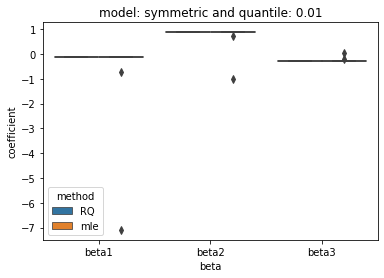

beta1 0.4036374753644574
beta2 0.36413264799777345
beta3 0.41512764195559815
beta4 0.31020186031387625


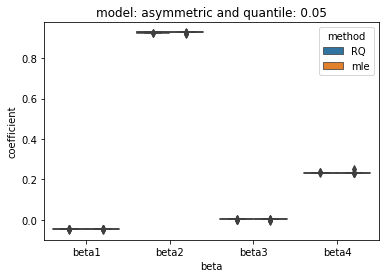

beta1 0.2947255847028092
beta2 0.4734779711127971
beta3 0.46759598511966954
beta4 0.49115352654004235


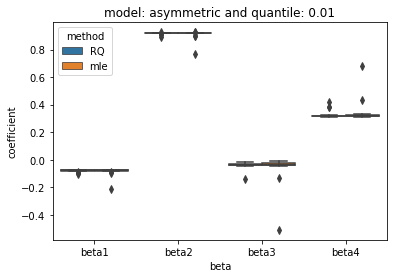

beta1 0.045245180453072
beta2 0.42669086837739656
beta3 0.41512764195559815


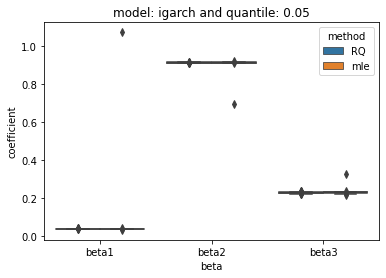

beta1 0.15915211373611382
beta2 0.3367475264008015
beta3 0.4036374753644574


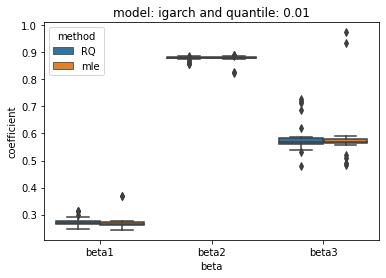

In [4]:
for model in beta_df.model.unique():
    for q in beta_df['quantile'].unique():
        plt.figure()
        sns.boxplot(
            data=beta_df[(beta_df['model']==model)&(beta_df['quantile']==q)],
            x='beta',
            y='coefficient',
            hue='method'
        )
        cond1 = beta_df['quantile']==q
        cond2 = beta_df['model']==model
        plt.title(f'model: {model} and quantile: {q}')
        for beta in beta_df[beta_df['model']==model].beta.unique():
            cond3 = beta_df['beta']==beta
            x = beta_df[(beta_df['method']=='mle')&cond1&cond2&cond3]['coefficient']
            y = beta_df[(beta_df['method']=='RQ')&cond1&cond2&cond3]['coefficient']
            print(beta, mannwhitneyu(x, y)[1])        
        plt.show()

In [ ]:
beta_df.groupby(
    ['model','quantile','beta','method']
).mean()